In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock-data-2025/MSFT_1986-03-13_2025-02-04.csv


In [2]:
df = pd.read_csv("/kaggle/input/microsoft-stock-data-2025/MSFT_1986-03-13_2025-02-04.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059827,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.061963,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063032,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061429,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060361,47894400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9800 non-null   object 
 1   Open       9800 non-null   float64
 2   High       9800 non-null   float64
 3   Low        9800 non-null   float64
 4   Close      9800 non-null   float64
 5   Adj Close  9800 non-null   float64
 6   Volume     9800 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 536.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Extrair o Ano e o Mês para facilitar o agrupamento
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name() 


In [6]:
# Agrupar os dados por 'Year' e 'Month' e calcular a média de cada variável
df_monthly = df.groupby(['Year', 'Month']).agg({
    'Open': 'mean', 
    'High': 'mean', 
    'Low': 'mean', 
    'Close': 'mean', 
    'Adj Close': 'mean', 
    'Volume': 'sum' 
}).reset_index()


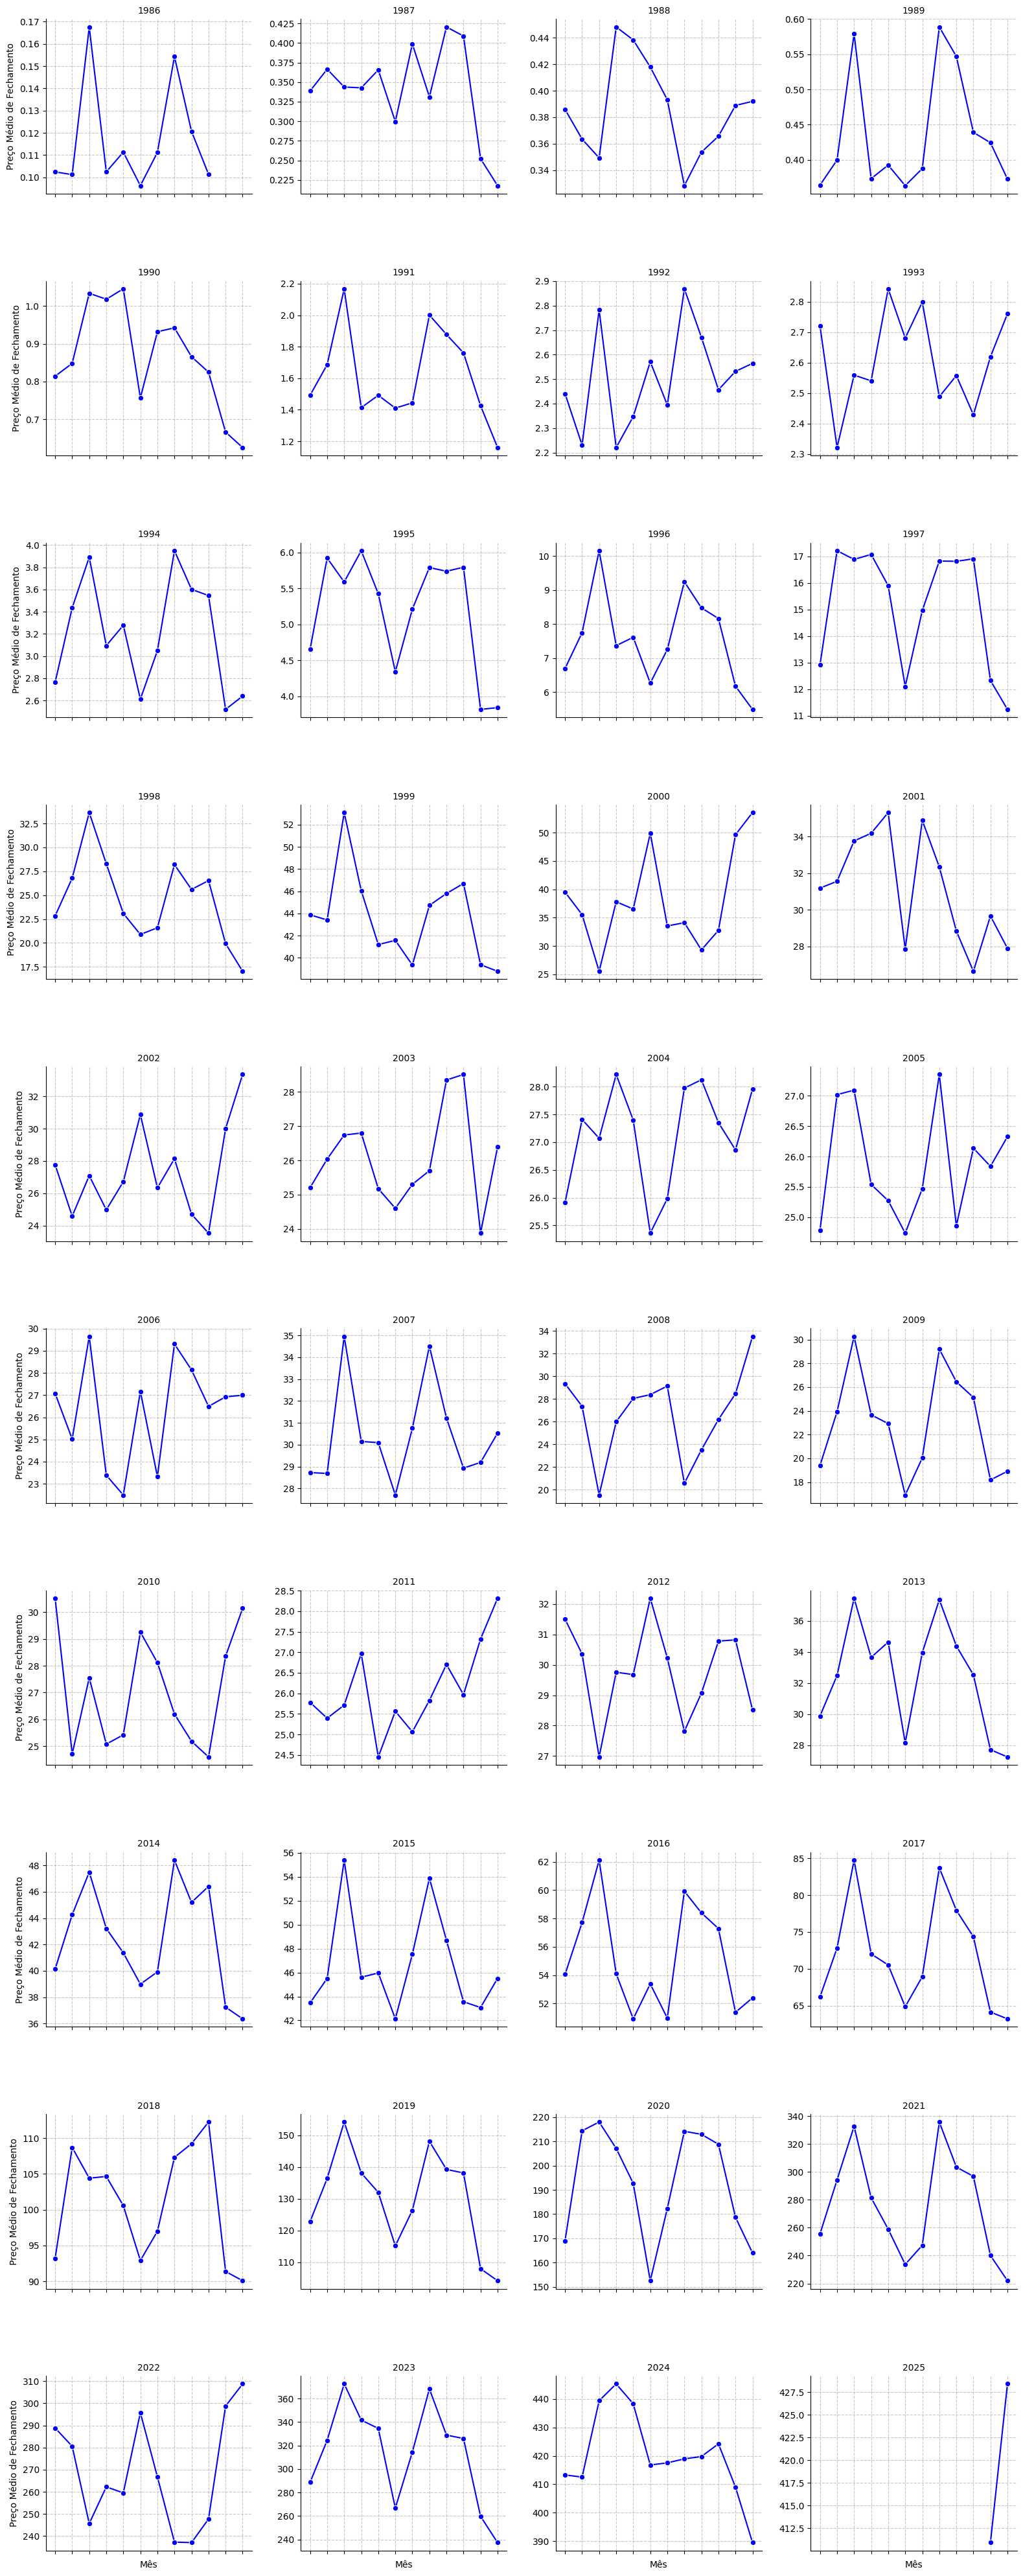

In [7]:
# Usando FacetGrid para criar múltiplos gráficos
g = sns.FacetGrid(df_monthly, col="Year", col_wrap=4, height=4, sharey=False)

# Plotando o gráfico de linha
g.map(sns.lineplot, 'Month', 'Close', marker='o', color='b')

# Ajustando os títulos de cada gráfico
g.set_titles("{col_name}")

# Ajustando os rótulos dos eixos
g.set_axis_labels('Mês', 'Preço Médio de Fechamento')

# Corrigir a ordenação de meses e a rotação dos rótulos
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
g.set(xticks=range(len(months_order)), xticklabels=months_order)

# Rotacionar os rótulos do eixo x para melhor visualização
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(True, axis='both', linestyle='--', alpha=0.7)

# Ajustar o espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5)

# Mostrar o gráfico
plt.show()
